# Buchdahl equation of state example for O$_2$sclpy

See the O$_2$sclpy documentation at https://neutronstars.utk.edu/code/o2sclpy for more information.

In [1]:
import o2sclpy
import matplotlib.pyplot as plot
import ctypes
import numpy
import sys

plots=True
if 'pytest' in sys.modules:
    plots=False

Link the O$_2$scl library:

In [2]:
link=o2sclpy.linker()
link.link_o2scl()

Get a copy (a pointer to) the O$_2$scl unit conversion object:

In [3]:
cu=link.o2scl_settings.get_convert_units()

Create the Buchdahl EOS object:

In [4]:
b=o2sclpy.eos_tov_buchdahl(link)

Create the TOV solve object, set the EOS and compute the M-R curve:

In [5]:
ts=o2sclpy.tov_solve(link)
ts.set_eos(b);
ts.fixed(1.4,1.0e-4)
print('Exact radius is %7.6e, computed radius is %7.6e.' %
      (b.rad_from_gm(1.4),ts.rad))
print('Relative difference %7.6e.' %
      (abs(b.rad_from_gm(1.4)-ts.rad)/ts.rad))

1.400000e+00 solar mass mode.
Central P: 5.2000e-05 (Msun/km^3), M: 2.2703e+00 (Msun), R: 1.5779e+01 (km)
Central P: 5.2000e-05 (Msun/km^3), M: 2.2703e+00 (Msun), R: 1.5779e+01 (km)
Central P: 5.2000e-05 (Msun/km^3), M: 2.2703e+00 (Msun), R: 1.5779e+01 (km)
Central P: 1.5746e-05 (Msun/km^3), M: 1.2137e+00 (Msun), R: 1.5329e+01 (km)
Central P: 2.2140e-05 (Msun/km^3), M: 1.4453e+00 (Msun), R: 1.5395e+01 (km)
Central P: 2.0889e-05 (Msun/km^3), M: 1.4027e+00 (Msun), R: 1.5381e+01 (km)
Central P: 2.0811e-05 (Msun/km^3), M: 1.4000e+00 (Msun), R: 1.5380e+01 (km)
Central P: 2.0812e-05 (Msun/km^3), M: 1.4000e+00 (Msun), R: 1.5380e+01 (km)
Central P: 2.0812e-05 (Msun/km^3), M: 1.4000e+00 (Msun), R: 1.5380e+01 (km)
Gravitational mass is: 1.400000e+00
Radius is: 1.538043e+01
Exact radius is 1.538043e+01, computed radius is 1.538043e+01.
Relative difference 5.976744e-10.


Get the table for the TOV results:

In [ ]:
tov_table=ts.get_results()

The compactness of a 1.4 solar mass NS:

In [6]:
beta=ts.mass*b.G_km_Msun/ts.rad

Construct two lists, a radius grid and a list containing the
relative difference of the exact and calculated enclosed
gravitational mass:

In [7]:
radial_grid=[]
rel_diff=[]
for i in range(1,tov_table.get_nlines()):
    r=tov_table['r'][i]
    radial_grid.append(r)
    enc_mass=r*(1.0-1.0/b.exp2lam_from_r_gm(tov_table['r'][i],
                                            beta))/2.0/b.G_km_Msun
    enc_mass2=tov_table['gm'][i]
    rel_diff.append(abs(enc_mass-enc_mass2)/enc_mass)

Initialize the plotting object:

In [8]:
if plots:
    pl=o2sclpy.plotter()

Plot the enclosed gravitational mass as a function of
radius for a 1.4 solar mass neutron star:

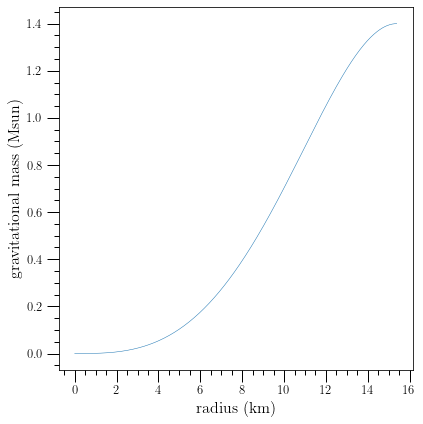

In [9]:
if plots:
    pl.canvas()
    plot.plot(tov_table['r'][0:tov_table.get_nlines()],
              tov_table['gm'][0:tov_table.get_nlines()])
    pl.xtitle('radius (km)')
    pl.ytitle('gravitational mass (Msun)')
    plot.show()

For the enclosed gravitational mass, plot the relative
difference of the exact results and that computed from
the tov_solve class:

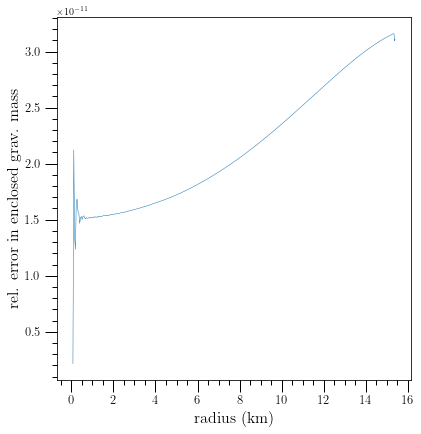

In [10]:
if plots:
    pl.canvas_flag=False
    pl.canvas()
    plot.plot(radial_grid,rel_diff)
    pl.xtitle('radius (km)')
    pl.ytitle('rel. error in enclosed grav. mass')
    plot.show()

For testing using ``pytest``:

In [11]:
def test_fun():
    assert numpy.allclose(b.rad_from_gm(1.4),ts.rad,rtol=1.0e-9,atol=0)
    for i in range(0,len(rel_diff)):
        assert numpy.allclose(rel_diff[i],0.0,atol=5.0e-11)
    return